# Importing Libraries

In [1]:
#pip install --upgrade numpy pandas tensorflow keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Ingestion

In [3]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

In [4]:
ml_client = MLClient(DefaultAzureCredential(),
                    subscription_id= "59370939-111d-4222-9d04-935c1efb51d7",
                    resource_group_name= "santosh24496-rg",
                    workspace_name= "ML_Practice")

In [5]:
data_asset = ml_client.data.list()
for da in data_asset:
    print(da.name)

yt_shorts
food_demand_forecast
apple_stock_price


In [6]:
data_asset = ml_client.data.get(name='apple_stock_price', version = '1')
print(data_asset.path)

azureml://subscriptions/59370939-111d-4222-9d04-935c1efb51d7/resourcegroups/santosh24496-rg/workspaces/ML_Practice/datastores/workspaceblobstore/paths/UI/2025-12-02_093119_UTC/P614 DATASET.csv


In [7]:
dataset = pd.read_csv(data_asset.path)
dataset.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
5,2012-01-10,60.844284,60.857143,60.214287,60.462856,52.248333,64549100
6,2012-01-11,60.382858,60.407143,59.901428,60.364285,52.163139,53771200
7,2012-01-12,60.325714,60.414288,59.821430,60.198570,52.019955,53146800
8,2012-01-13,59.957142,60.064285,59.808571,59.972858,51.824898,56505400
9,2012-01-17,60.599998,60.855713,60.422855,60.671429,52.428562,60724300


In [8]:
df = dataset.copy()

# Data Exploration


In [9]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2011.0,1.267075e+02,5.048375e+01,5.542429e+01,8.588286e+01,1.130500e+02,1.651900e+02,2.911200e+02
High,2011.0,1.278276e+02,5.092630e+01,5.708571e+01,8.671786e+01,1.141900e+02,1.674100e+02,2.939700e+02
Low,2011.0,1.255803e+02,5.012494e+01,5.501429e+01,8.505643e+01,1.118700e+02,1.634250e+02,2.881200e+02
Close,2011.0,1.267412e+02,5.057837e+01,5.579000e+01,8.620214e+01,1.130500e+02,1.652450e+02,2.915200e+02
Adj Close,2011.0,1.195055e+02,5.243844e+01,4.892193e+01,7.505668e+01,1.052229e+02,1.600471e+02,2.895226e+02
Volume,2011.0,5.949670e+07,4.683856e+07,1.136200e+07,2.758565e+07,4.346900e+07,7.471030e+07,3.765300e+08


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [13]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

In [14]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

# Data Preprocessing

In [15]:
df = df.set_index('Date').sort_index()

In [16]:
# Resampling the date frequency to Day
fq_d = df['Close'].asfreq('D')

In [17]:
fq_d = fq_d.ffill()

In [18]:
# Resampling the Date frequency to business days frequency
fq_bd = df['Close'].asfreq('B')

In [19]:
fq_bd = fq_bd.ffill()
print(fq_bd.isna().sum())

0


In [20]:
fq_bd.name = 'stock_price'
fq_d.name = 'stock_price'

In [21]:
fq_d.shape

(2919,)

# EDA

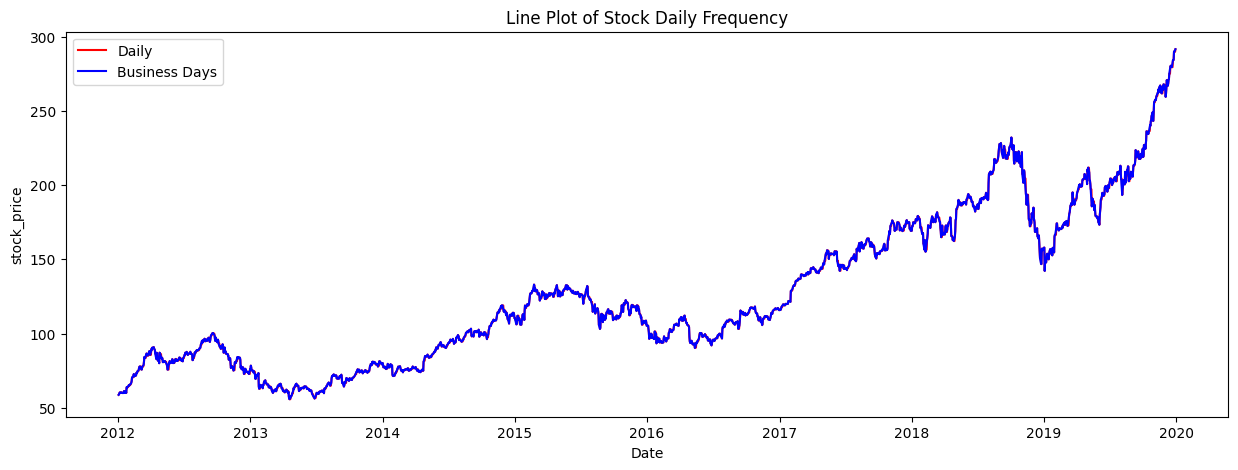

In [22]:
plt.figure(figsize = (15,5))
sns.lineplot(data = fq_d, color = 'red', label = 'Daily')
sns.lineplot(data = fq_bd, color = 'blue', label = 'Business Days')
plt.title('Line Plot of Stock Daily Frequency')
plt.show()



In [23]:
percent_change = fq_bd.pct_change()
percent_change.describe()

count    2084.000000
mean        0.000895
std         0.015836
min        -0.123558
25%        -0.006461
50%         0.000172
75%         0.009151
max         0.088741
Name: stock_price, dtype: float64

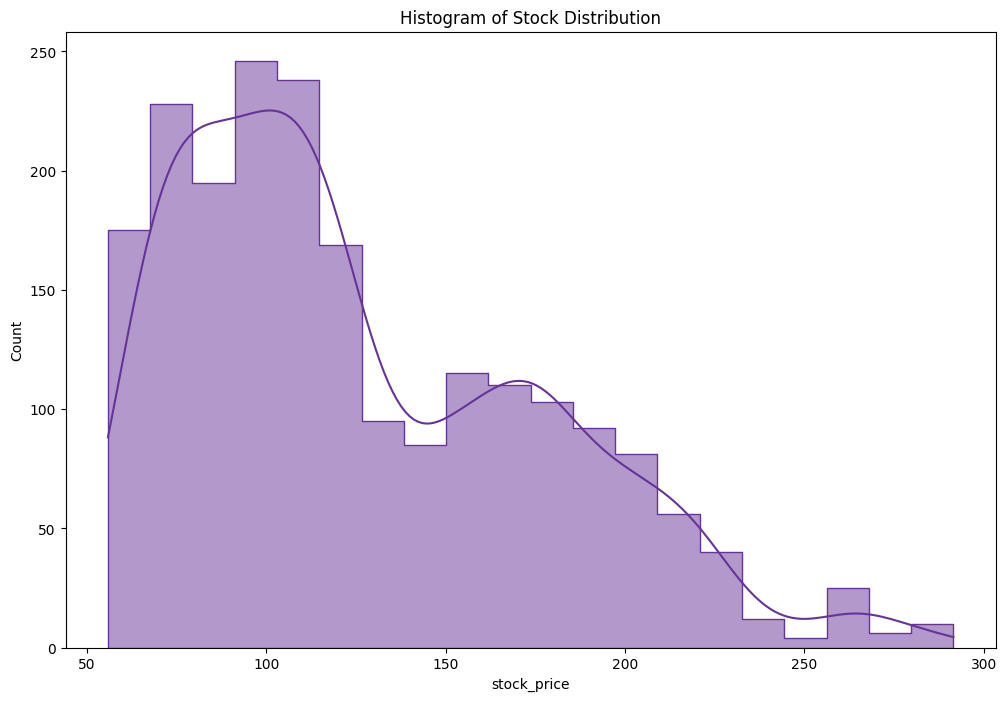

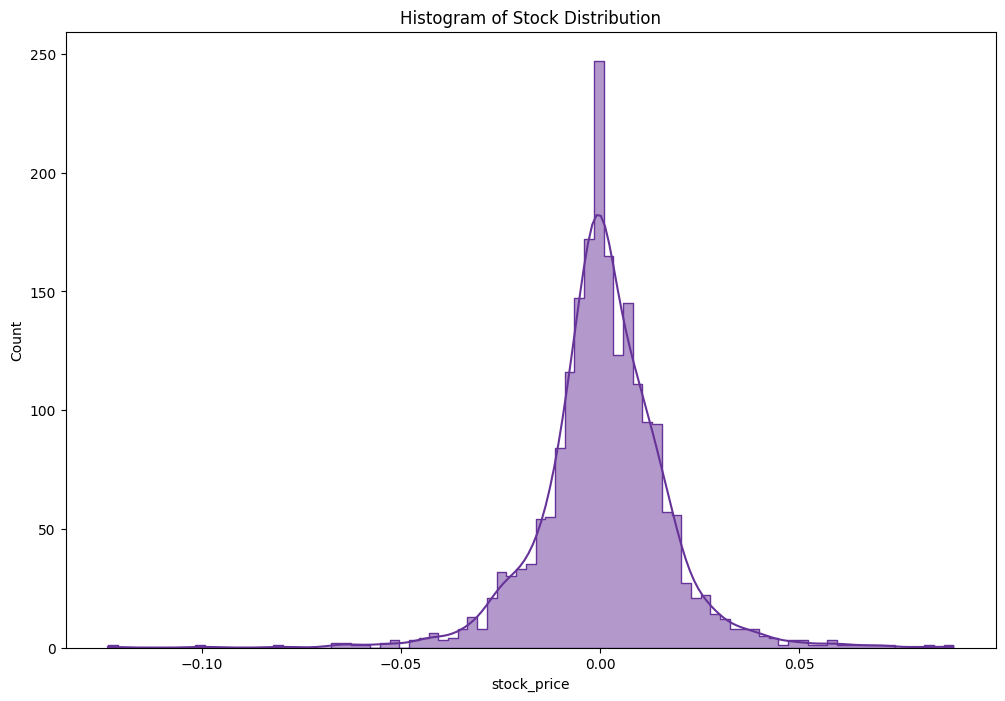

In [24]:
plt.figure(figsize = (12,8))
sns.histplot(fq_bd, kde = True, element = 'step', multiple = 'layer', color = 'rebeccapurple')
plt.title('Histogram of Stock Distribution')
plt.show()

plt.figure(figsize = (12,8))
sns.histplot(fq_bd.pct_change(), kde = True, element = 'step', multiple = 'layer', color = 'rebeccapurple')
plt.title('Histogram of Stock Distribution')
plt.show()

Roughly symmetric, centered around zero after pct change. There's a noticable left skew which tells the stock prices have decreased few times when compared to previous day

## Decomposition

In [25]:
#import sys
#!{sys.executable} -m pip install statsmodels

In [26]:
from statsmodels.tsa.seasonal import STL

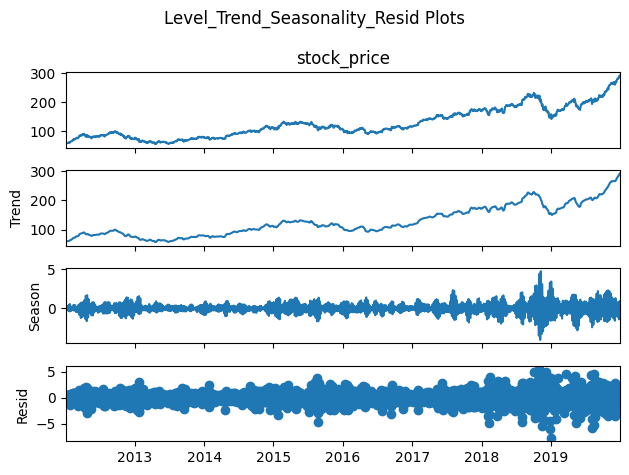

In [27]:
stl_decomposition = STL(fq_bd).fit()
stl_decomposition.plot()
plt.suptitle('Level_Trend_Seasonality_Resid Plots')
plt.subplots_adjust(top=0.85)
plt.show()

**Trend**:

The trend line confirms a strong, persistent positive trend. The stock price has consistently increased over the years.

**Seasonality**:

This strongly suggests that there is no strong, fixed-period seasonality present in this stock price data. Most stock prices do not exhibit strong seasonality over time.

**Residuals**:

The residuals are scattered around zero, which is generally a good sign, indicating that the Trend and Season components have captured the structured variation in the data well.

The variance of the residuals appears to increase over time, particularly in the later years (post-2018). This means the unexplained volatility in the stock price has risen, suggesting that the model's predictive accuracy for the remaining randomness might be lower in the latter period.

There are several distinct points (circled) that are further away from the zero line, especially around 2019, which represent irregular or extreme price movements not accounted for by the long-term trend or seasonality.


## Lag Plots

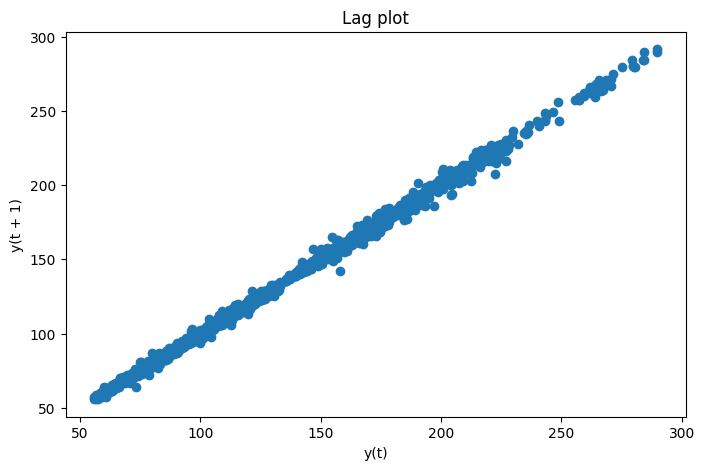

In [28]:
plt.figure(figsize =(8,5))
pd.plotting.lag_plot(fq_bd, lag =1)
plt.title('Lag plot')
plt.show()

**The linear pattern indicates that todays price is strongly correlated with yesterdays.**

## Test for Stationarity - Augmented Dickey Fuller Test

In [29]:
from statsmodels.tsa.stattools import adfuller

In [30]:
print(adfuller(fq_bd, autolag = "AIC"))

(np.float64(0.9784275763275049), np.float64(0.9940330382763088), 26, 2058, {'1%': np.float64(-3.433531474838333), '5%': np.float64(-2.862945426040308), '10%': np.float64(-2.567518185091057)}, np.float64(8871.05142625511))


In [31]:
def adf_test(data):
    if adfuller(data)[1]>=0.05:
        print('The Data is not Stationery')
    else:
        print('The Data is Stationaery')
    print(f'ADF Stats : {adfuller(data)[0]}')
    print(f'p-value : {adfuller(data)[1]}')
    print(f'Confidence Levels : {adfuller(data)[4]}')

In [32]:
adf_test(fq_bd)

The Data is not Stationery
ADF Stats : 0.9784275763275049
p-value : 0.9940330382763088
Confidence Levels : {'1%': np.float64(-3.433531474838333), '5%': np.float64(-2.862945426040308), '10%': np.float64(-2.567518185091057)}


Hypotheses
Null hypothesis (H₀): The time series has a unit root → it is non-stationary.

Alternative hypothesis (H₁): The time series is stationary.

ADF Statistic	More negative → stronger evidence against H₀

p>= 0.05 -- accept null, p<0.05 reject null

If ADF statistic < critical value → reject H₀ at that confidence level → series is stationary.

If ADF statistic > critical value → fail to reject H₀ → series is non-stationary.

In [33]:
from statsmodels.tsa.statespace.tools import diff

In [34]:
diffs = {}
for i in range(1,5):
    diffs[f"diff{i}"] = diff(fq_bd, k_diff = i)

In [35]:
for i in range(1,5):
    print(f'Differencing with {i}')
    adf_test(diffs[f'diff{i}'])
    print("-"*20)


Differencing with 1
The Data is Stationaery
ADF Stats : -7.644871217058821
p-value : 1.8540849298764147e-11
Confidence Levels : {'1%': np.float64(-3.433531474838333), '5%': np.float64(-2.862945426040308), '10%': np.float64(-2.567518185091057)}
--------------------
Differencing with 2
The Data is Stationaery
ADF Stats : -14.763144015670589
p-value : 2.3850452143196895e-27
Confidence Levels : {'1%': np.float64(-3.433533023432548), '5%': np.float64(-2.8629461097716633), '10%': np.float64(-2.567518549139982)}
--------------------
Differencing with 3
The Data is Stationaery
ADF Stats : -20.88486957933817
p-value : 0.0
Confidence Levels : {'1%': np.float64(-3.4335345735350664), '5%': np.float64(-2.862946794168607), '10%': np.float64(-2.567518913543354)}
--------------------
Differencing with 4
The Data is Stationaery
ADF Stats : -23.214334483587617
p-value : 0.0
Confidence Levels : {'1%': np.float64(-3.4335376782738374), '5%': np.float64(-2.8629481649631496), '10%': np.float64(-2.56751964341

**Differencing with 1 made the data stationery**
We need to chose the d value as 1 to get better results in models like ARIMA and SARIMA. But lets check with the auto arima which gives the best thresholds for p,d,q

## Stationarity Visualization

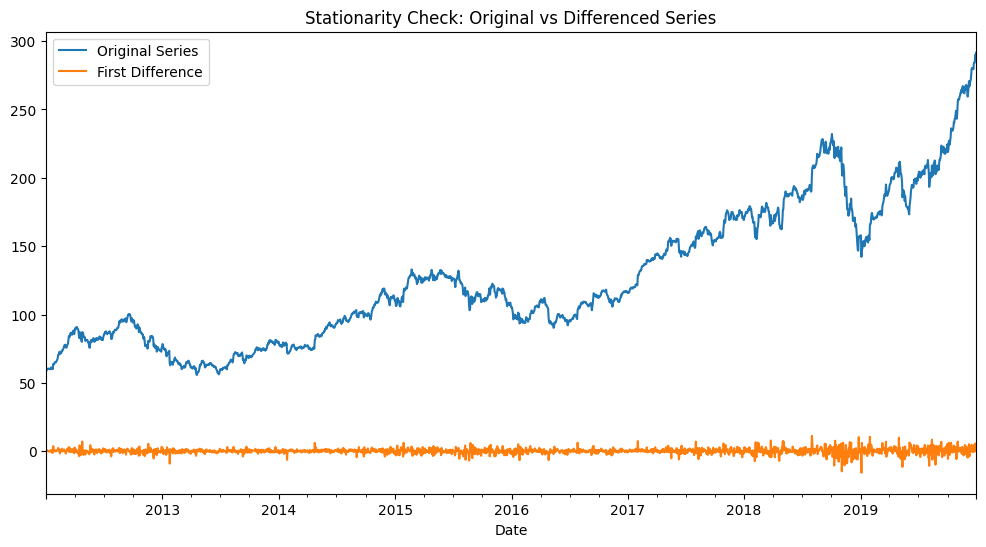

In [36]:
plt.figure(figsize=(12,6))
fq_bd.plot(label='Original Series')
fq_bd.diff().plot(label='First Difference')
plt.legend()
plt.title("Stationarity Check: Original vs Differenced Series")
plt.show()

**First Difference fluctuates around zero with no visible trend.
Variance appears more stable.
Suggests the series is now stationary**

## ACF and PACF Plost

In [37]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [38]:
plt.figure(figsize=(12,5))
plot_acf(fq_bd, lags = 20, title = 'ACF_Plot')
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(fq_bd, lags = 20, title = 'PACF_Plot')
plt.show()

<Figure size 1200x500 with 0 Axes>
<Figure size 1200x500 with 0 Axes>

PACF: Sharp cut-off after lag 2	AR(2)

ACF: Slow decay	Non-stationary --- differencing needed

p=2  from PACF

d=1  from ADF test and ACF decay

q=0  no strong MA component seen in ACF

# Split Data

In [39]:
h = 30
train = fq_d.iloc[:-h]
test = fq_d.iloc[-h:]
print(train.shape)
print(test.shape)


(2889,)
(30,)


# Initial Model Building

## Exponential models

### Simple Exponential

In [40]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [41]:
ses = SimpleExpSmoothing(train).fit(optimized=True)


In [42]:
ses.params

{'smoothing_level': np.float64(0.9758784163070168),
 'smoothing_trend': np.float64(nan),
 'smoothing_seasonal': np.float64(nan),
 'damping_trend': nan,
 'initial_level': np.float64(58.747143),
 'initial_trend': np.float64(nan),
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [43]:
ses_forecast = pd.Series(ses.forecast(h), index = test.index)

In [44]:
ses_forecast.head(10)

Date
2019-12-01    267.250342
2019-12-02    267.250342
2019-12-03    267.250342
2019-12-04    267.250342
2019-12-05    267.250342
2019-12-06    267.250342
2019-12-07    267.250342
2019-12-08    267.250342
2019-12-09    267.250342
2019-12-10    267.250342
Freq: D, dtype: float64

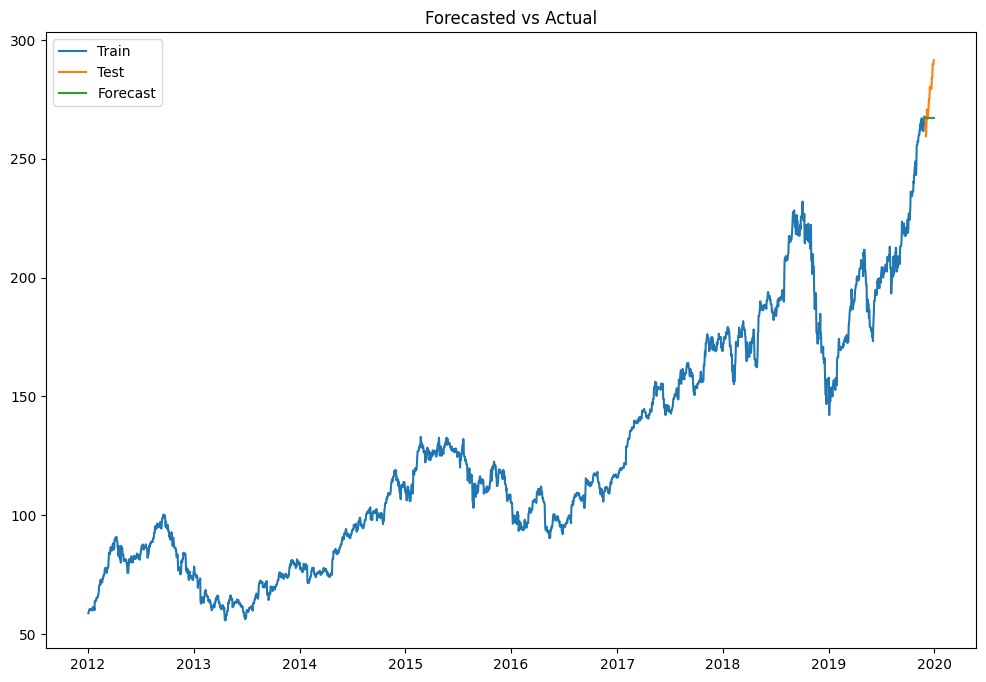

In [45]:
plt.figure(figsize = (12,8))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(ses_forecast, label = 'Forecast')
plt.title('Forecasted vs Actual')
plt.legend()
plt.show()

### Double and Triple Exponential

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
import itertools

In [47]:
best_score = float('inf')
best_params = None

for trend, seasonal, sp in itertools.product (['add','mul'], ['add','mul'], [5,7]):
    model = ExponentialSmoothing(train,trend = trend, seasonal = seasonal, seasonal_periods = sp )
    es = model.fit()
    es_forecast = es.forecast(h)
    mse = mean_squared_error(test,es_forecast)
    rmse = np.sqrt(mse)

    if rmse < best_score:
        best_score = rmse
        best_params = (trend, seasonal, sp)

print(best_score)
print(best_params)



/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


10.140073156336317
('mul', 'mul', 7)


In [48]:
es = ExponentialSmoothing(train, trend = 'add', seasonal = None).fit()
es_forecast = pd.Series(es.forecast(h), index = test.index)

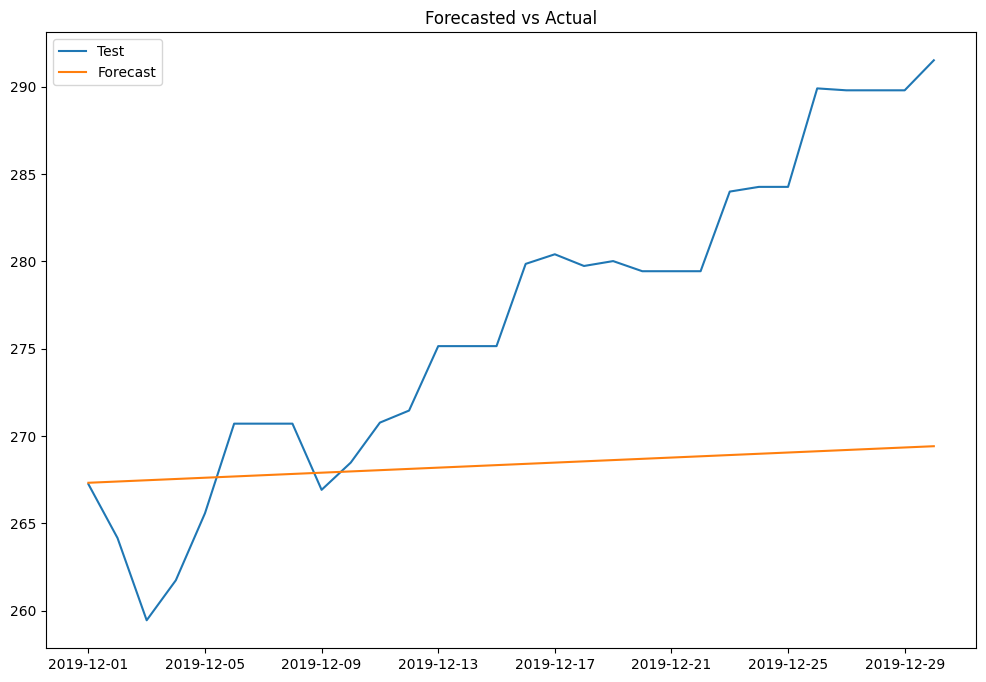

In [49]:
plt.figure(figsize = (12,8))
#plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(es_forecast, label = "Forecast")
plt.title('Forecasted vs Actual')
plt.legend()
plt.show()

## ARIMA Model

### Auto ARIMA

In [50]:
#%pip install pmdarima

In [51]:
from pmdarima import auto_arima

In [52]:
at_arima = auto_arima(y =train, max_p = 5, max_q = 5, max_d= 5, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11438.808, Time=8.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11453.995, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11454.268, Time=0.49 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11454.153, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11456.869, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11450.678, Time=4.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11452.530, Time=2.66 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11440.073, Time=8.31 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11440.067, Time=19.53 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11457.995, Time=1.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11451.351, Time=5.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11450.771, Time=2.95 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=11442.275, Time=13.29 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=11442.068, Time=4.15 sec

Best model:  ARI

### ARIMA

In [53]:
from statsmodels.tsa.api import ARIMA

In [68]:
arima = ARIMA(train, order = (2,1,2)).fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            stock_price   No. Observations:                 2889
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5716.034
Date:                Thu, 11 Dec 2025   AIC                          11442.068
Time:                        05:41:17   BIC                          11471.910
Sample:                    01-03-2012   HQIC                         11452.823
                         - 11-30-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4831      0.052     -9.212      0.000      -0.586      -0.380
ar.L2         -0.8377      0.041    -20.444      0.000      -0.918      -0.757
ma.L1          0.4500      0.058      7.711      0.000       0.336       0.564
ma.L2          0.7947      0.046     17.333      0.000       0.705       0.885
sigma2         3.0671      0.034     91.385      0.000       3.001       3.133
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):             13884.28
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               5.11   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

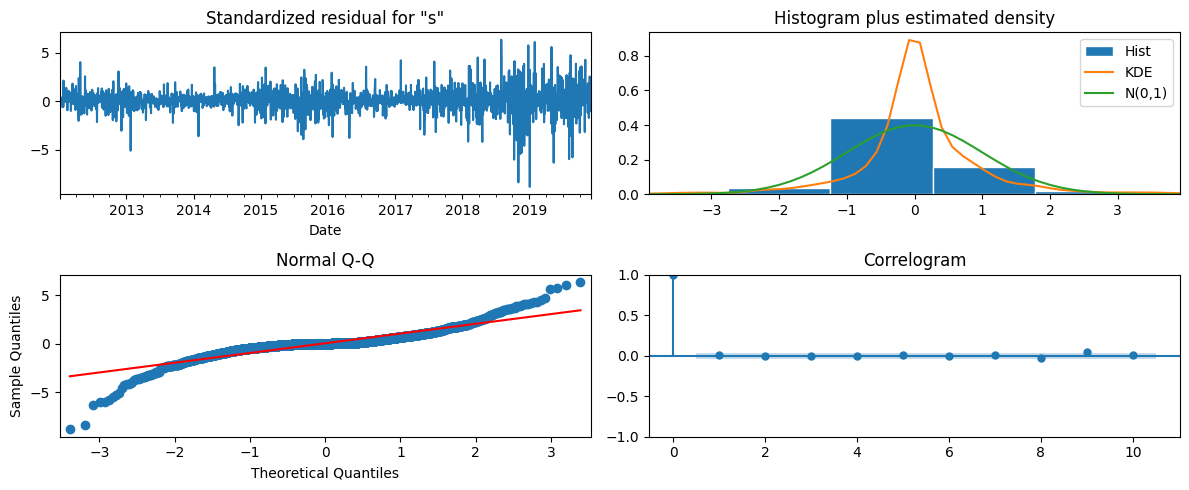

In [69]:
arima.plot_diagnostics(figsize = (12,5))
plt.tight_layout()
plt.show()

In [70]:
arima_forecast = arima.forecast(h)

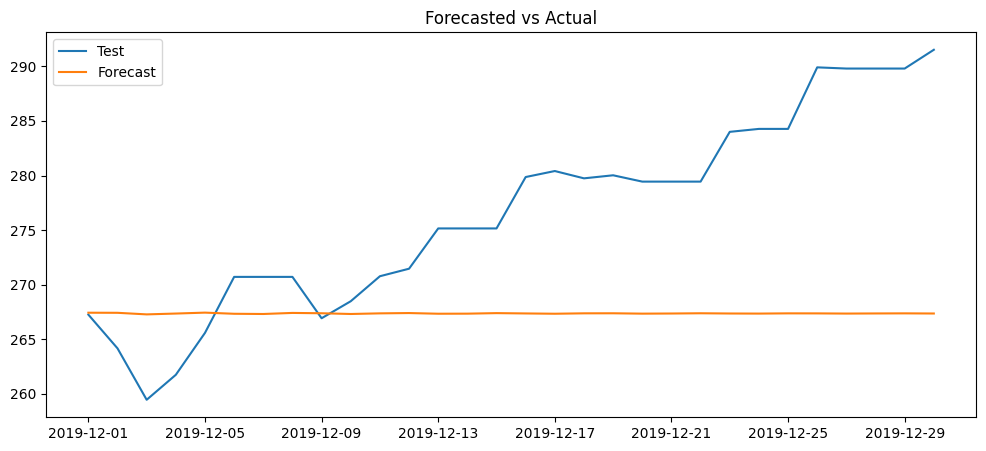

In [80]:
plt.figure(figsize = (12,5))
#plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(arima_forecast, label = 'Forecast')
plt.title('Forecasted vs Actual')
plt.legend()
plt.show()

## SARIMA 

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [73]:
sarima = SARIMAX(train, order = (2,1,2), trend = 'c').fit()
sarima_forecast = sarima.forecast(steps = h)


In [74]:
sarima_forecast.head(15)

2019-12-01    267.502291
2019-12-02    267.564289
2019-12-03    267.491019
2019-12-04    267.642064
2019-12-05    267.797712
2019-12-06    267.763763
2019-12-07    267.817582
2019-12-08    267.987364
2019-12-09    268.027800
2019-12-10    268.033869
2019-12-11    268.164590
2019-12-12    268.263786
2019-12-13    268.274092
2019-12-14    268.353681
2019-12-15    268.474045
Freq: D, Name: predicted_mean, dtype: float64

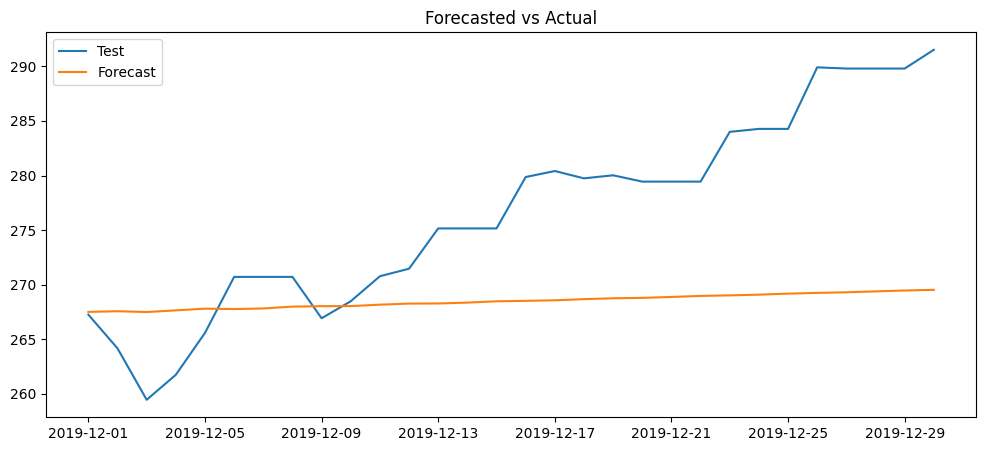

In [79]:
plt.figure(figsize = (12,5))
#plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(sarima_forecast, label = 'Forecast')
plt.title('Forecasted vs Actual')
plt.legend()
plt.show()

### Log_SARIMA

In [76]:
log_train = np.log(train)
log_sarima = SARIMAX(log_train, order = (2,1,2), trend = 'c').fit()
log_sarima_forecast = pd.Series(np.exp(log_sarima.get_forecast(steps = h).predicted_mean), index = test.index)

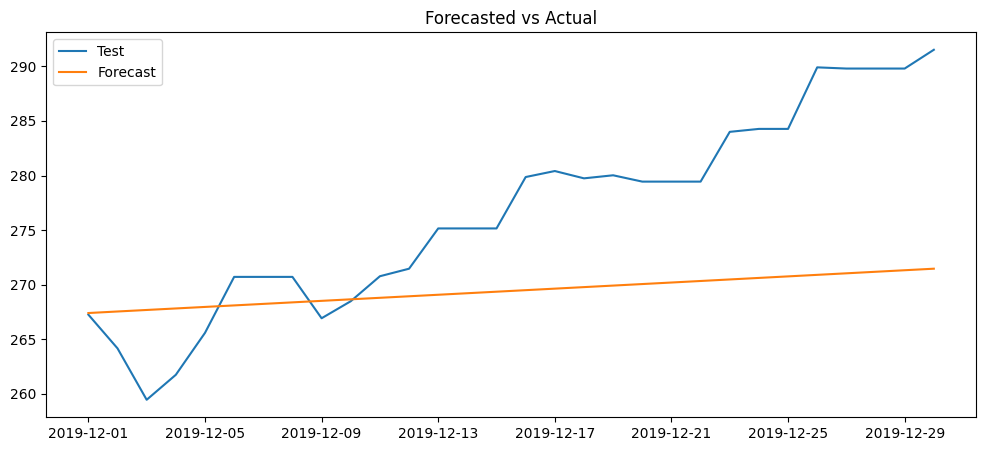

In [78]:
plt.figure(figsize = (12,5))
#plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(log_sarima_forecast, label = 'Forecast')
plt.title('Forecasted vs Actual')
plt.legend()
plt.show()

# Feature Engineering

As the initial models were not forecasting the data ensemble models might forecast well. For the Regression models we need more data to predict the target variable hence creating new features with the target feature helps to predict well.

In [64]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [65]:
def create_features(data):
    data['Date'] = pd.to_datetime(data['Date'])
    d = data.set_index('Date').sort_index()
    d = d['Close'].asfreq('D')
    d = d.ffill()
    pct = d.pct_change()
    features = pd.DataFrame({
        'r_1' : pct.shift(1),
        'r_5' : pct.rolling(5).mean().shift(1),
        'std' : pct.rolling(10).std().shift(1),
        'mavg_5' : d.rolling(5).mean().shift(1),
        'mavg_20' : d.rolling(20).mean().shift(1),
        'rsi_14' : (pct.clip(lower = 0).rolling(14).mean()/
                    (pct.abs().rolling(14).mean() + 1e-9)).shift(1),
        'dow' : d.index.dayofweek
    }).dropna()
    y = pct.loc[features.index]
    return features, y, d



In [66]:
X, y, price = create_features(dataset)

In [67]:
h = 30
X_train, X_test = X.iloc[:-h], X.iloc[-h:]
y_train, y_test = y.iloc[:-h], y.iloc[-h:]
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((2869, 7), (30, 7), (2869,), (30,))